In [ ]:
'''This file contains the code and results for the multiclass classification movie revenue prediction problem'''

# Pull in raw dataset to coding environment utilizing pandas to read the csv, provide a dataframe structure and add correspoding attribute labels:

from pandas.core.ops.array_ops import isna
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Raw dataset is stored in Google Drive. Mounted google drive to access original IMDB dataset:
movies = pd.read_csv('/content/drive/MyDrive/820/21Jan2023- 820- Movie metadata.csv')

col_names = ["Color", "Director Name", "# Critic Reviews", "Duration", "# Director Likes", "# Actor 3 Likes", "Actor 2 Name", "# Actor 1 Likes", "Gross", "Genres", 
             "Actor 1 Name", "Movie Title", "# Users Voted", "# Cast Likes", "Actor 3 Name", "# FB Poster", "Plot Keywords", "Movie Link", "# Users for Reviews", "Language", "Country",
             "Content Rating", "Budget", "Title Year", "# Actor 2 Likes", "IMDB Score", "Aspect Ratio", "# Movie Likes"]
movies.columns = col_names

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Language,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [ ]:
# Remove missing data and provide verification via the table below prior to moving forward with further preparation steps:

movies = movies.dropna()
pd.set_option('float_format', '{:.2f}'.format)
show_Missing = movies.isna().sum()
show_Missing

Color                  0
Director Name          0
# Critic Reviews       0
Duration               0
# Director Likes       0
# Actor 3 Likes        0
Actor 2 Name           0
# Actor 1 Likes        0
Gross                  0
Genres                 0
Actor 1 Name           0
Movie Title            0
# Users Voted          0
# Cast Likes           0
Actor 3 Name           0
# FB Poster            0
Plot Keywords          0
Movie Link             0
# Users for Reviews    0
Language               0
Country                0
Content Rating         0
Budget                 0
Title Year             0
# Actor 2 Likes        0
IMDB Score             0
Aspect Ratio           0
# Movie Likes          0
dtype: int64

In [ ]:
from pandas.core.groupby.grouper import DataFrame

# Initialize gross revenue classes for our multi- class classification problem. 

'''Revenue Classes:
      $0 - 24.99M
      $25 - 99.99M
      $100 - 249.99M
      $250 - 499.99M
      $500M - 1000000000'''

#Assign each movie to a REVENUE CLASS:
movies['Classes'] = pd.cut(movies.Gross, bins = [0, 24999999, 99999999,249999999, 499999999, 1000000000], 
       labels = ['Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5'])

In [ ]:
column1 = ['$0 - 24.99M', '$25 - 99.99M', '$100 - 249.99M', '$250 - 499.99M', '$500 - 1.0B']
column2 = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

classes = pd.DataFrame(columns = ['Revenue', 'Class'])

classes['Revenue'] = column1
classes['Class'] = column2

classes

,Revenue,Class
0,$0 - 24.99M,Class 1
1,$25 - 99.99M,Class 2
2,$100 - 249.99M,Class 3
3,$250 - 499.99M,Class 4
4,$500 - 1.0B,Class 5


In [ ]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,Language,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes,Classes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,Class 5
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0,Class 4
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000,Class 3
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000,Class 4
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.00,2012.00,632.00,6.60,2.35,24000,Class 2


In [ ]:
# Utilize sci-kit learn machine learning packages:

from sklearn import preprocessing

# Encode each text- based variable with a corresponding numerical value:
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder()

movies['Director Name'] = label_encoder.fit_transform(movies['Director Name'])
movies['Color'] = label_encoder.fit_transform(movies['Color'])
movies['Actor 2 Name'] = label_encoder.fit_transform(movies['Actor 2 Name'])
movies['Genres'] = label_encoder.fit_transform(movies['Genres'])
movies['Language'] = label_encoder.fit_transform(movies['Language'])
movies['Country'] = label_encoder.fit_transform(movies['Country'])
movies['Content Rating'] = label_encoder.fit_transform(movies['Content Rating'])
movies['Title Year'] = label_encoder.fit_transform(movies['Title Year'])
movies['Actor 1 Name'] = label_encoder.fit_transform(movies['Actor 1 Name'])
movies['Actor 3 Name'] = label_encoder.fit_transform(movies['Actor 3 Name'])

movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,Language,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes,Classes
0,1,620,723.00,178.00,0.00,855.00,1002,1000.00,760505847.00,91,...,9,43,7,237000000.00,66,936.00,7.90,1.78,33000,Class 5
1,1,538,302.00,169.00,563.00,1000.00,1592,40000.00,309404152.00,85,...,9,43,7,300000000.00,64,5000.00,7.10,2.35,0,Class 4
2,1,1395,602.00,148.00,0.00,161.00,1795,11000.00,200074175.00,107,...,9,42,7,245000000.00,72,393.00,6.80,2.35,85000,Class 3
3,1,251,813.00,164.00,22000.00,23000.00,381,27000.00,448130642.00,243,...,9,43,7,250000000.00,69,23000.00,8.50,2.35,164000,Class 4
5,1,62,462.00,132.00,475.00,530.00,1837,640.00,73058679.00,105,...,9,43,7,263700000.00,69,632.00,6.60,2.35,24000,Class 2


In [ ]:
# Remove unwanted features:
movies = movies.drop(['Movie Title', 'Movie Link', 'Plot Keywords'], axis = 1) 

# Set aside the Classes label for future train-test splitting:
y = movies.pop('Classes')

In [ ]:
# Utilize min-max scaling method to provide a relative numerical scale to the data:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(movies)
scaled_Movies = scaler.fit_transform(movies)
scaled_Movies = pd.DataFrame(scaled_Movies, columns = movies.columns)
scaled_Movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Language,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,1.00,0.37,0.89,0.48,0.00,0.04,0.46,0.00,1.00,0.12,...,0.60,0.27,0.98,0.64,0.02,0.90,0.01,0.82,0.04,0.09
1,1.00,0.32,0.37,0.45,0.02,0.04,0.73,0.06,0.41,0.11,...,0.24,0.27,0.98,0.64,0.02,0.88,0.04,0.71,0.08,0.00
2,1.00,0.84,0.74,0.38,0.00,0.01,0.82,0.02,0.26,0.14,...,0.20,0.27,0.95,0.64,0.02,0.99,0.00,0.68,0.08,0.24
3,1.00,0.15,1.00,0.43,0.96,1.00,0.17,0.04,0.59,0.33,...,0.53,0.27,0.98,0.64,0.02,0.95,0.17,0.90,0.08,0.47
4,1.00,0.04,0.57,0.32,0.02,0.02,0.84,0.00,0.10,0.14,...,0.15,0.27,0.98,0.64,0.02,0.95,0.00,0.65,0.08,0.07


In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Separate into training and validation sets, remember that the y variable representing the class label has already been initialized in a previous step:
X = scaled_Movies

In [ ]:
# Partitioning the data into training, test and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.8, shuffle = True)

In [ ]:
# Utilize Gaussian Naive Bayes:
import time
from sklearn.naive_bayes import GaussianNB

start = time.time()

gnb_Model = GaussianNB()

# Train the model on the data:
gnb_Model.fit(X_train, y_train)

end =  time.time()
print(end - start, "seconds")

start = time.time()

# Generate predictions:
gnb_Predictions = gnb_Model.predict(X_test)

# Display the first 20 predictions:
gnb_Predictions[0:20]

end =  time.time()
print(end - start, "seconds")

0.017716407775878906 seconds
0.0037841796875 seconds


In [ ]:
# Utilize Support Vector Machine:

from sklearn import svm

start = time.time()

svm_Model = svm.SVC(kernel = 'linear') 

# Train the model on the data:
svm_Model.fit(X_train, y_train)

end =  time.time()
print(end - start, "seconds")

start = time.time()

# Generate predictions:
svm_Predictions = svm_Model.predict(X_test)

# Display the first 20 predictions:
svm_Predictions[0:20]

end =  time.time()
print(end - start, "seconds")

0.5163547992706299 seconds
0.15779733657836914 seconds


In [ ]:
# Utilize Decision Tree:

from sklearn import tree

start = time.time()

tree_Model = tree.DecisionTreeClassifier()

# Train the model on the data:
tree_Model = tree_Model.fit(X_train, y_train)

end =  time.time()
print(end - start, "seconds")

start = time.time()

# Generate predictions:
tree_Predictions = tree_Model.predict(X_test)

# Display the first 20 predictions:
tree_Predictions[0:20]

end =  time.time()
print(end - start, "seconds")

0.023783206939697266 seconds
0.0017905235290527344 seconds


In [ ]:
# Utilize machine learning evaluation tools to assess the performance of the model:

from sklearn import metrics

# Calculate and display the accuracy scores for each model:
print("Accuracy: GAUSSIAN NAIVE BAYES:", metrics.accuracy_score(y_test, gnb_Predictions))
print("Accuracy: SVM:", metrics.accuracy_score(y_test, svm_Predictions))
print("Accuracy: DECISION TREE:", metrics.accuracy_score(y_test, tree_Predictions))

Accuracy: GAUSSIAN NAIVE BAYES: 0.625
Accuracy: SVM: 0.8723404255319149
Accuracy: DECISION TREE: 0.9986702127659575


In [ ]:
# Utilize cross- validation techniques to evaluate the performance of the model:
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# Perform 10- fold cross validation testing on the Gaussian Naive Bayes model:
k_folds = KFold(n_splits=10)
gnb_cross_Scores = cross_val_score(gnb_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
gnb_cross_Scores.mean()

0.28984210526315785

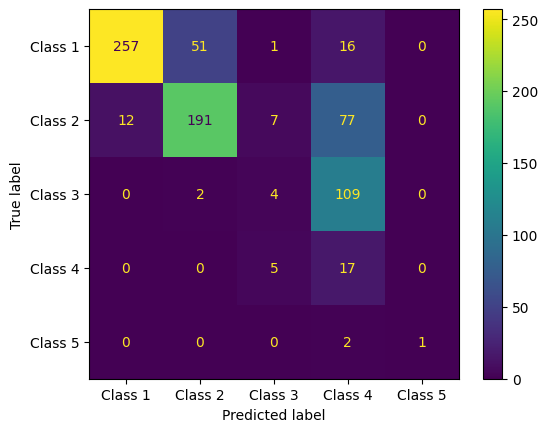

In [ ]:
# Display Confusion Matrix to visualize the performance of the Gaussian Naive Bayes predictions:

cm_gnb = confusion_matrix(y_test, gnb_Predictions, labels = gnb_Model.classes_)
disp_gnb =  ConfusionMatrixDisplay(confusion_matrix = cm_gnb, display_labels = gnb_Model.classes_)
disp_gnb.plot()
plt.show()

In [ ]:
# Perform 10- fold cross validation testing on the Gaussian Naive Bayes model:
k_folds = KFold(n_splits = 10)
svm_cross_Scores = cross_val_score(svm_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
print(svm_cross_Scores)
svm_cross_Scores.mean()

[0.78947368 0.82894737 0.72       0.69333333 0.70666667 0.62666667
 0.61333333 0.82666667 0.70666667 0.69333333]


0.7205087719298247

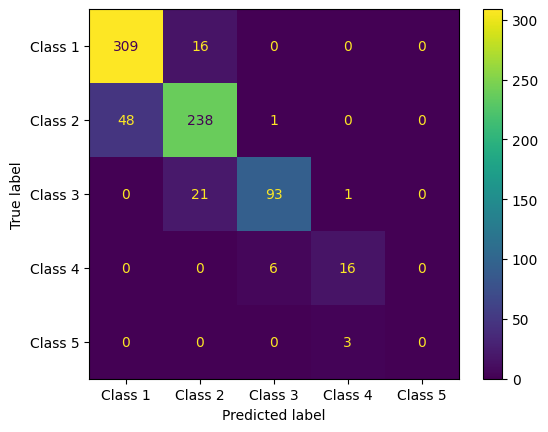

In [ ]:
# Display Confusion Matrix to visualize the performance of the Suppoer Vector Machine predictions:

cm_svm = confusion_matrix(y_test, svm_Predictions, labels = svm_Model.classes_)
disp_svm =  ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = svm_Model.classes_)
disp_svm.plot()
plt.show()

In [ ]:
# Perform 10- fold cross validation testing on the Decision Tree model:
k_folds = KFold(n_splits = 10)
tree_cross_Scores = cross_val_score(tree_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
tree_cross_Scores.mean()

0.9986842105263157

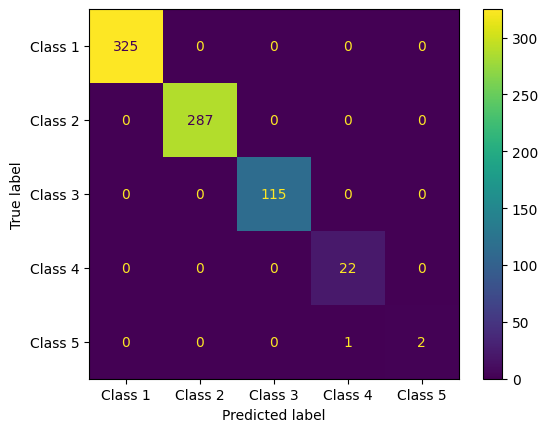

In [ ]:
# Display Confusion Matrix to visualize the performance of the Decision Tree predictions:
cm_Tree = confusion_matrix(y_test, tree_Predictions, labels = tree_Model.classes_)
disp_Tree =  ConfusionMatrixDisplay(confusion_matrix = cm_Tree, display_labels = tree_Model.classes_)
disp_Tree.plot()
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, auc, roc_curve

# Compare Algorithm Performance:

models = []
models.append(('GNB', gnb_Model))
models.append(('DT', tree_Model))
models.append(('SVM', svm_Model))

In [ ]:
import time
from sklearn import model_selection
# Evaluate each model in turn:

start = time.time()

results = []
names = []
scoring = 'accuracy'

for name, model in models:
  kfold = model_selection.KFold(n_splits = 10)
  cv_results =  model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f(%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

end = time.time()
print(end - start, "seconds")

GNB: 0.669769(0.025730)
DT: 0.999667(0.001000)
SVM: 0.875826(0.018746)
2.9611973762512207 seconds


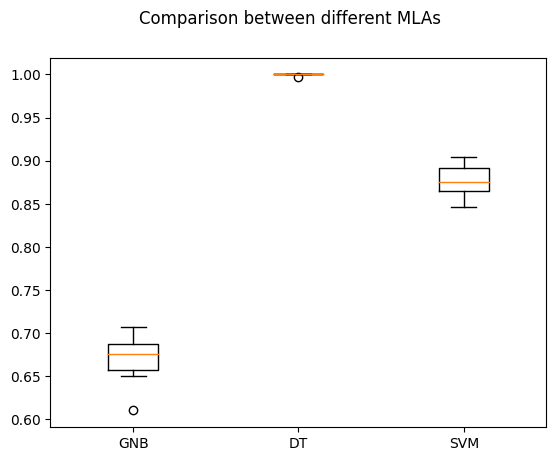

In [ ]:
# Display Boxplot Algorithm Comparison:

fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()